In [1]:
from lib2 import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

## Q1

In [2]:
A, b = fileread("matrices1.txt")

# Check if the matrix is symmetric
if is_symmetric(A):
    print("Matrix is symmetric")
else:
    print("Matrix is not symmetric")

# Solve using Cholesky decomposition
x_cho = cholesky_solver(A, b)
print("Solution using Cholesky decomposition:", x_cho)

# Gauss-Seidel method
x = gauss_seidel_method(A, b)
print("Solution using Gauss-Seidel method:", x)

Matrix is symmetric
Solution using Cholesky decomposition: [1. 1. 1. 1. 1. 1.]
iterations for gauss siedel: 15
Solution using Gauss-Seidel method: [0.999999, 0.999999, 1.0, 1.0, 1.0, 1.0]


## Q2

In [10]:
A, B = fileread("matrices2.txt",5)
A = np.array(A)
B = np.array(B)
A , B = make_diagonally_dominant(A,B)
a, x = gauss_jordan(A, B)
print("Solution using Gauss-Jordan method:", x)

y = LU_decompose(A, B)
print("Solution using LU_decomposition:", y)

Solution using Gauss-Jordan method: [ 2.67460205  3.71188539 -0.05330739 -0.07442519  5.25907322]
Solution using LU_decomposition: [ 2.67460205  3.71188539 -0.05330739 -0.07442519  5.25907322]


## Q3

Solution using Conjugate Gradient method: [30.47883312  2.63336843 22.47266506 30.47883312  2.63336843 22.47266506]


100%|██████████| 6/6 [00:00<00:00, 130.77it/s]

[[ 0.93506435  0.87020904  2.5862825   0.2077916   0.41562301 -3.57266074]
 [ 0.29004306  0.58016411 -0.30284142  0.13852799  0.27705066 -2.1030247 ]
 [ 0.08658004  0.1731777  -1.35751346  0.05627698  0.11247155 -2.01379156]
 [ 0.2077916   0.41562301 -3.57266074  0.93506435  0.87020904  2.5862825 ]
 [ 0.13852799  0.27705066 -2.1030247   0.29004306  0.58016411 -0.30284142]
 [ 0.05627698  0.11247155 -2.01379156  0.08658004  0.1731777  -1.35751346]]


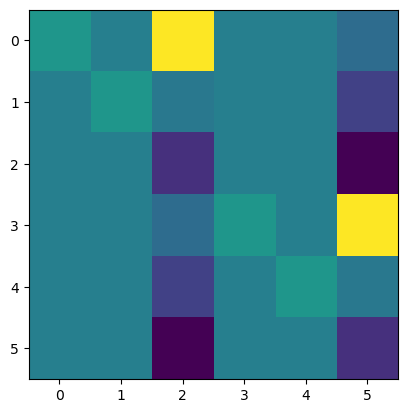

In [5]:
A, B = fileread("matrices3.txt")
# Define the initial guess
x0 = np.zeros_like(b)
# Set the tolerance and maximum number of iterations
tol = 1e-6

# Solve the system of equations using the Conjugate Gradient method
x = cg(A, x0, b, 1000, tol)

# Print the solution
print("Solution using Conjugate Gradient method:", x)

# Finding the inverse of a matrix using Conjugate Gradient method
n = len(b)
Ai = np.zeros((n,n))
for i in tqdm(range(n)):
    b = np.zeros(n)
    b[i] = 1
    x0 = np.ones(n)
    x = cg(A, x0, b, 1000, 1e-6)
    Ai[i] = x
Ai = Ai.T
print(Ai)
plt.imshow(np.dot(A,Ai))

## Q4

100%|██████████| 50/50 [00:05<00:00,  9.55it/s]

[[-2.11578492 -2.06230706 -1.84384462 ... -1.5936755  -1.13901763
  -0.59323835]
 [-2.06230706 -3.95962955 -3.54018167 ... -3.05985695 -2.18691384
  -1.13901763]
 [-1.84384462 -3.54018167 -4.95330419 ... -4.28124985 -3.05985695
  -1.5936755 ]
 ...
 [-1.5936755  -3.05985695 -4.28124985 ... -4.95330419 -3.54018167
  -1.84384462]
 [-1.13901763 -2.18691384 -3.05985695 ... -3.54018167 -3.95962955
  -2.06230706]
 [-0.59323835 -1.13901763 -1.5936755  ... -1.84384462 -2.06230706
  -2.11578492]]


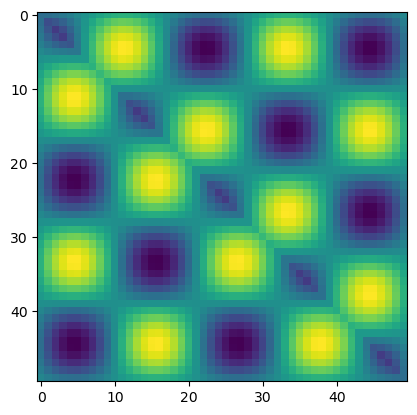

In [6]:
n = 50
Ai = np.zeros((n,n))
r = np.zeros((50,50))
for i in tqdm(range(n)):
    b = np.zeros(n)
    b[i] = 1
    x0 = np.ones(n)
    x, res = cg_fly(x0, b, 1000, 1e-6)
    r[i][:len(res)] = res
    Ai[i] = x

Ai = Ai.T
print(Ai)
plt.imshow(Ai)

In [7]:
# generate random number between 0 to 49
random_number = random.randint(0, 49)
print("The step number displayed:",random_number)

The step number displayed: 20


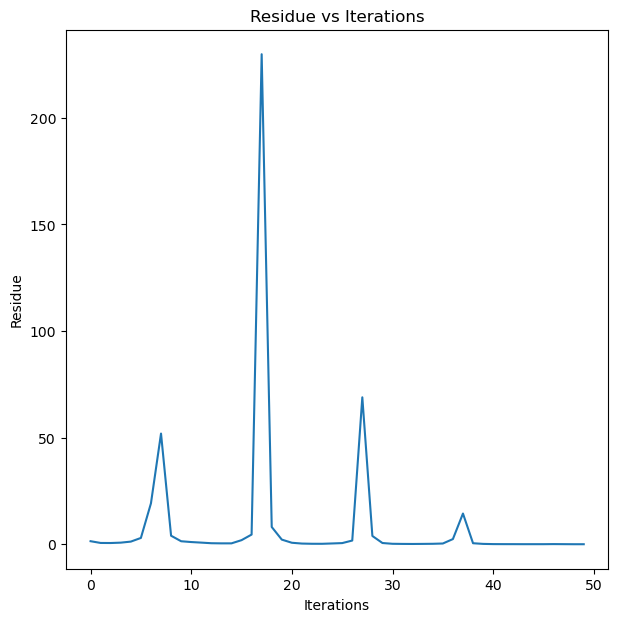

In [8]:
iter = np.arange(0, 50)

plt.figure(figsize=(7,7))
plt.plot(iter, r[random_number])
plt.xlabel('Iterations')
plt.ylabel('Residue')
plt.title('Residue vs Iterations')
plt.show()